In [ ]:
# prevent the Colab runtime from disconnecting & automatically click the connect button in Google Colab at regular intervals (every minute)

# copy javascript (inside triple quotes) --> right click and select Inspect --> paste in console

'''
function ConnectButton(){
     console.log("Connect pushed");
     document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);
'''

## **Hugging Face Transformer Pipeline Model Evaluation**

In [ ]:
'''
CPUs (Central Processing Units) - generally designed for serial processing, meaning they execute one instruction at a time.

GPUs (Graphics Processing Units)- have a massively parallel architecture with thousands of cores.
                                  This allows them to perform many calculations simultaneously,
                                  making them highly efficient for tasks that can be parallelized.

Deep learning involves a lot of matrix operations, such as matrix multiplications.
GPUs are optimized for these types of operations, and their architecture allows them to perform these calculations much faster than CPUs.
'''

In [ ]:
# accelerate - it is a Python library developed by Hugging Face, purpose is to speed up the training and inference process of deep learning models.

# datasets.load_dataset - specifically designed for loading datasets from the Hugging Face Datasets Hub,
#                         which is a centralized repository of various datasets for natural language processing tasks.

!pip install --upgrade pip
!pip install --upgrade git+https://github.com/huggingface/transformers.git accelerate datasets[audio]

from datasets import load_dataset

In [ ]:
'''
Torch - torch is a library that provides support for numerical operations using tensors, which are multi-dimensional arrays.
        It's a fundamental library for deep learning and scientific computing

Tensors - similar to arrays but come with additional features (like automatic differentiation) specifically designed for deep learning.
'''

import torch

In [ ]:
'''
AutoModelForSpeechSeq2Seq - Automatic Model for Speech Sequence-to-Sequence
                            automatically load any pre-trained speech-to-sequence model from Hugging Face's model hub

AutoProcessor - process of preparing your data for a specific pre-trained model by automatically choosing the right data processor
'''

from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# cuda - GPUs are often more efficient for certain types of computations (like deep learning), and using them can significantly speed up your code.

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
# float32 - floating-point number for more accuracy and memory to store number ; float16 - less accuracy and memory used in GPU

torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32
torch_dtype

torch.float16

In [ ]:
# sets up and loads the "whisper-small" model, and moves it to the specified computing device for further processing (like CPU or GPU)

model_id = "openai/whisper-small"

model = AutoModelForSpeechSeq2Seq.from_pretrained(model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True)
print(model)
model.to(device)

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.84k [00:00<?, ?B/s]

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (f

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (f

In [ ]:
#  automatically load the appropriate processor for 'openai/whisper-small' model

processor = AutoProcessor.from_pretrained(model_id)      # model_id = 'openai/whisper-small'
processor

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

WhisperProcessor:
- feature_extractor: WhisperFeatureExtractor {
  "chunk_length": 30,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 80,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "WhisperProcessor",
  "return_attention_mask": false,
  "sampling_rate": 16000
}

- tokenizer: WhisperTokenizer(name_or_path='openai/whisper-small', vocab_size=50258, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|endoftext|>', '<|startoftranscript|>', '<|en|>', '<|zh|>', '<|de|>', '<|es|>', '<|ru|>', '<|ko|>', '<|fr|>', '<|ja|>', '<|pt|>', '<|tr|>', '<|pl|>', '<|ca|>', '<|nl|>', '<|ar|>', '<|sv|>', '<|it|>', '<|id|>', '<|hi|>', '<|fi|>', '<|vi|>', '<|he|>', '<|uk|>',

In [ ]:
# create an Automatic Speech Recognition (ASR) pipeline for the Marathi audio-to-text project

pipe = pipeline(
                task = "automatic-speech-recognition",            # specifies the task for which you are creating the pipeline
                model = model,                                    # specifies the ASR model to be used
                tokenizer = processor.tokenizer,                  # tokenizer preparing raw audio data (continuous waveform) break into smaller chunks or frames that ASR model can process
                feature_extractor = processor.feature_extractor,  # important features extracted from raw audio for model to learn patterns and make predictions about the spoken words in audio
                max_new_tokens = 128,                             # limits the maximum no of tokens in generated text (1 word = 1 token), from 129 to all text are truncated (cut off)
                chunk_length_s = 30,                              # ASR system each chunks of audio to text by processing it in 30-second segments.
                batch_size = 16,                                  # number of audio chunks processed simultaneously in each batch
                return_timestamps = True,                         # Timestamps provide information about when each word in the transcription occurs in the audio
                torch_dtype = torch_dtype,                        # specifies the data type used by the PyTorch framework
                device = device                                   # specifies the device (GPU or CPU) on which the model will run --> 'cuda:0'
              )
pipe

In [ ]:
# locale module is used to handle enabling adaptation to different languages and encodings,
# like date and time formats, currency symbols, and character encodings.

import locale

locale.getpreferredencoding = lambda: "UTF-8"

# UTF-8 is a character encoding that supports a wide range of characters from various languages,
# making it a good choice for handling text data with different character sets.

In [ ]:
!pip install python-Levenshtein

In [ ]:
#  calculates the similarity percentage between two text strings using Levenshtein distance metric

# Levenshtein distance - measures minimum number of single-character edits (insert, delete, or substitute)
#                        required to change one string into another

import Levenshtein

def calculate_text_similarity_percentage(text1, text2):

    distance = Levenshtein.distance(text1, text2)                 # (hello, halo) ------> 'e' to 'a' ----> 'l' to remove ----> so 2 edits need 'hello' convert to 'halo'

    max_length = max(len(text1), len(text2))                      # hello=5; halo=4 -----> max = 5

    similarity_percentage = 100 - (distance / max_length * 100)   # 100 - (2/5 * 100) = 60

    return similarity_percentage                                  # so 60% similarity between 'hello' and 'halo'


In [ ]:
# Remove specific special characters from the input text using regular expressions

import re

def remove_special_characters(text):

    pattern = '[,\|\?\.\!\-\;\:\"\“\%\‘\”\�।]'        # defines a set of special characters to be removed.

    cleaned_text = re.sub(pattern, '', text).strip()  # Use re.sub to replace matched characters to empty string & strip() remove empty space in both ends of text

    return cleaned_text

**Sample audio check: 1**

In [ ]:
text1 = 'अनेक रचना अभंग गवळणी असे स्फुट लेखन त्यांनी केले'                                   # He wrote many compositions that are unbreakable
text2 = remove_special_characters(' अनेक रचना, अभंग, गवलनी असे स्पूट लेकन त्याननी केली।')   # Many Rachna Abhang Gavalni spoot but she did it

similarity_percentage = calculate_text_similarity_percentage(text1, text2)
print(f'{similarity_percentage:.2f}')

85.42


**Sample audio check: 2**

In [ ]:
text1 = 'या पानास लेखाचे स्वरूप यायला हवे'                               # This page should take the form of an article
text2 = remove_special_characters('या पानास लेखासे स्वरूप याईला हवे।')   # This page should be in article format

similarity_percentage = calculate_text_similarity_percentage(text1, text2)
print(f'{similarity_percentage:.2f}')

93.75


**Sample audio check: 3**

In [ ]:
text1 = 'अनेक रचना अभंग गवळणी असे स्फुट लेखन त्यांनी केले'  # He wrote a lot of compositions, such as Abhang Gavalni
text2 = 'अनेक रचना अभंग गवळणी असे स्फुट लेखन त्यांनी केले'  # He wrote a lot of compositions, such as Abhang Gavalni

similarity_percentage = calculate_text_similarity_percentage(text1, text2)
print(f'{similarity_percentage:.2f}')

100.00


In [ ]:
# connect your Colab with your Google Drive. This allows you to access files and data stored in your Google Drive directly from your Colab notebook.

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# uses the os library to list all the files in a specific directory

import os

file_list = os.listdir('/content/drive/MyDrive/Voice_AI_Project/Audio')

print(file_list)

['common_voice_mr_27761932.wav', 'common_voice_mr_27592001.wav', 'common_voice_mr_27703232.wav', 'common_voice_mr_27762809.wav', 'common_voice_mr_27703254.wav', 'common_voice_mr_27761944.wav', 'common_voice_mr_27639584.wav', 'common_voice_mr_27761903.wav', 'common_voice_mr_27593311.wav', 'common_voice_mr_27762395.wav', 'common_voice_mr_27762369.wav', 'common_voice_mr_27761847.wav', 'common_voice_mr_27762912.wav', 'common_voice_mr_27703294.wav', 'common_voice_mr_27703242.wav', 'common_voice_mr_27703303.wav', 'common_voice_mr_27762881.wav', 'common_voice_mr_27593300.wav', 'common_voice_mr_27761963.wav', 'common_voice_mr_27593279.wav', 'common_voice_mr_27593240.wav', 'common_voice_mr_27762407.wav', 'common_voice_mr_27703282.wav', 'common_voice_mr_27593236.wav', 'common_voice_mr_27593322.wav', 'common_voice_mr_27762894.wav', 'common_voice_mr_27762511.wav', 'common_voice_mr_27762871.wav', 'common_voice_mr_27684807.wav', 'common_voice_mr_27591987.wav', 'common_voice_mr_27762501.wav', 'common

In [ ]:
len(file_list)

833

In [ ]:
# take 1st 500 audio files only for further process

file_list = file_list[0:500]

print(file_list)
len(file_list)

['common_voice_mr_27761932.wav', 'common_voice_mr_27592001.wav', 'common_voice_mr_27703232.wav', 'common_voice_mr_27762809.wav', 'common_voice_mr_27703254.wav', 'common_voice_mr_27761944.wav', 'common_voice_mr_27639584.wav', 'common_voice_mr_27761903.wav', 'common_voice_mr_27593311.wav', 'common_voice_mr_27762395.wav', 'common_voice_mr_27762369.wav', 'common_voice_mr_27761847.wav', 'common_voice_mr_27762912.wav', 'common_voice_mr_27703294.wav', 'common_voice_mr_27703242.wav', 'common_voice_mr_27703303.wav', 'common_voice_mr_27762881.wav', 'common_voice_mr_27593300.wav', 'common_voice_mr_27761963.wav', 'common_voice_mr_27593279.wav', 'common_voice_mr_27593240.wav', 'common_voice_mr_27762407.wav', 'common_voice_mr_27703282.wav', 'common_voice_mr_27593236.wav', 'common_voice_mr_27593322.wav', 'common_voice_mr_27762894.wav', 'common_voice_mr_27762511.wav', 'common_voice_mr_27762871.wav', 'common_voice_mr_27684807.wav', 'common_voice_mr_27591987.wav', 'common_voice_mr_27762501.wav', 'common

500

In [ ]:
# Excel files have columns of audio_file_names and audio_text

import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Voice_AI_Project/trans.xlsx')  # read excel file using pandas library

f = df.set_index('audio_name')['audio_text'].to_dict()                    # Excel file convert to dictionary file

print(f)

{'common_voice_mr_32645351.wav': 'स्वेच्छानिवृतीचा पध्दत मोठ्या प्रमाणात अंमलात आल्यापासून या दुखण्याने अनेक घरांत प्रवेश केला आहे', 'common_voice_mr_32127661.wav': 'चार चार विषय आहेत', 'common_voice_mr_32127660.wav': 'क्रोष्टु सहस्रजित् नल अंतिक व लघु अशी त्याच्या पुत्रांची नावे आढळतात', 'common_voice_mr_32126825.wav': 'त्यातील एर्देनि हे रत् नाचे व सुबाशिदि हे सुभाषिताचे मंगोलियन भाषारूप होय', 'common_voice_mr_32126698.wav': 'आदरार्थी शब्दांनी केला जात असे लहानपणी गंगेजवळ असताना वसिष्ठांनी त्यांना सर्व वेद शिकविले होते', 'common_voice_mr_32121632.wav': 'खमंग वास येतोय', 'common_voice_mr_32121623.wav': 'चारुता सागर दिनकर दत्तात्रेय भोसले', 'common_voice_mr_32023928.wav': 'ही फेलोशिप मिळवणारे ते पहिले भारतीय होत', 'common_voice_mr_32022227.wav': 'तिचे सूत्रधार शंकरराव देव होते', 'common_voice_mr_31931304.wav': 'चला आज फिरायला जाऊयात', 'common_voice_mr_31928736.wav': 'मध्य भागातील पिवळ्या रंगावर वंदे मातरम् असे लिहिले', 'common_voice_mr_31917816.wav': 'थायलंडमध्ये रावणाचे शिल्प आढळते', 

In [ ]:
# jiwar - measure how well your system performs by compare predicted text output and reference text

!pip install jiwer

In [ ]:
# Evaluate audio sample for ASR predicted output text and reference text using metrics (WER & similarity_score)

import jiwer

evaluation = {'audio_name':[], 'predicted_text':[], 'reference_text':[], 'similarity_score':[], 'word_error_rate':[]}
c = 0

for i in file_list:

    audio_path = f"/content/drive/MyDrive/Voice_AI_Project/Audio/{i}"   # /content/drive/MyDrive/Voice_AI_Project/Audio/common_voice_mr_27591986.wav

    result = pipe(audio_path,                                           # Automatic Speech Recognition pipeline we pass audio file for speech-to-text process
                  return_timestamps=True,                               # Timestamps provide information about when each word in the transcription occurs in the audio
                  generate_kwargs={"language": "marathi"})              # specifies additional settings for ASR process. language of the input audio is Marathi.

    text = remove_special_characters(result['chunks'][0]['text'])

    similarity_percentage = calculate_text_similarity_percentage(text, f[i])
    score = float(str(f'{similarity_percentage:.2f}'))

    wer = jiwer.wer(text, f[i])                                         # Calculate Word Error Rate (WER) between ASR predicted and reference text
    error = float(str(f'{wer:.2f}'))                                    # convert value with 2 decimal point only

    evaluation['audio_name'].append(i)
    evaluation['predicted_text'].append(text)
    evaluation['reference_text'].append(f[i])
    evaluation['similarity_score'].append(score)
    evaluation['word_error_rate'].append(error)

    print(f"Audio Samples Completed = {c}")
    c += 1


Audio Samples Completed = 0
Audio Samples Completed = 1
Audio Samples Completed = 2
Audio Samples Completed = 3
Audio Samples Completed = 4
Audio Samples Completed = 5


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 6


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 7


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 8
Audio Samples Completed = 9
Audio Samples Completed = 10
Audio Samples Completed = 11


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 12
Audio Samples Completed = 13
Audio Samples Completed = 14
Audio Samples Completed = 15
Audio Samples Completed = 16
Audio Samples Completed = 17
Audio Samples Completed = 18
Audio Samples Completed = 19
Audio Samples Completed = 20
Audio Samples Completed = 21
Audio Samples Completed = 22
Audio Samples Completed = 23
Audio Samples Completed = 24


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 25
Audio Samples Completed = 26
Audio Samples Completed = 27
Audio Samples Completed = 28


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 29


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 30


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 31


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 32


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 33
Audio Samples Completed = 34


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 35


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 36
Audio Samples Completed = 37
Audio Samples Completed = 38
Audio Samples Completed = 39
Audio Samples Completed = 40
Audio Samples Completed = 41


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 42
Audio Samples Completed = 43
Audio Samples Completed = 44
Audio Samples Completed = 45
Audio Samples Completed = 46


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 47
Audio Samples Completed = 48
Audio Samples Completed = 49
Audio Samples Completed = 50
Audio Samples Completed = 51
Audio Samples Completed = 52
Audio Samples Completed = 53


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 54


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 55
Audio Samples Completed = 56


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 57
Audio Samples Completed = 58
Audio Samples Completed = 59
Audio Samples Completed = 60
Audio Samples Completed = 61
Audio Samples Completed = 62
Audio Samples Completed = 63
Audio Samples Completed = 64
Audio Samples Completed = 65
Audio Samples Completed = 66


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 67
Audio Samples Completed = 68


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 69
Audio Samples Completed = 70
Audio Samples Completed = 71
Audio Samples Completed = 72


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 73


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 74
Audio Samples Completed = 75
Audio Samples Completed = 76
Audio Samples Completed = 77
Audio Samples Completed = 78


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 79
Audio Samples Completed = 80
Audio Samples Completed = 81
Audio Samples Completed = 82


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 83
Audio Samples Completed = 84


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 85


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 86
Audio Samples Completed = 87
Audio Samples Completed = 88
Audio Samples Completed = 89
Audio Samples Completed = 90
Audio Samples Completed = 91
Audio Samples Completed = 92


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 93
Audio Samples Completed = 94
Audio Samples Completed = 95
Audio Samples Completed = 96


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 97
Audio Samples Completed = 98
Audio Samples Completed = 99
Audio Samples Completed = 100


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 101
Audio Samples Completed = 102


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 103
Audio Samples Completed = 104
Audio Samples Completed = 105
Audio Samples Completed = 106


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 107


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 108


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 109


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 110


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 111
Audio Samples Completed = 112


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 113


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 114
Audio Samples Completed = 115


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 116


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 117
Audio Samples Completed = 118
Audio Samples Completed = 119


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 120
Audio Samples Completed = 121
Audio Samples Completed = 122


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 123


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 124
Audio Samples Completed = 125


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 126


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 127


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 128
Audio Samples Completed = 129


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 130
Audio Samples Completed = 131


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 132


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 133


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 134


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 135


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 136


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 137
Audio Samples Completed = 138


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 139
Audio Samples Completed = 140
Audio Samples Completed = 141


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 142


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 143


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 144
Audio Samples Completed = 145


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 146


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 147
Audio Samples Completed = 148
Audio Samples Completed = 149
Audio Samples Completed = 150
Audio Samples Completed = 151


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 152


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 153


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 154


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 155


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 156


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 157


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 158


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 159
Audio Samples Completed = 160
Audio Samples Completed = 161
Audio Samples Completed = 162
Audio Samples Completed = 163


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 164
Audio Samples Completed = 165


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 166


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 167
Audio Samples Completed = 168
Audio Samples Completed = 169
Audio Samples Completed = 170


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 171
Audio Samples Completed = 172
Audio Samples Completed = 173


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 174
Audio Samples Completed = 175


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 176


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 177


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 178


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 179


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 180
Audio Samples Completed = 181


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 182
Audio Samples Completed = 183
Audio Samples Completed = 184


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 185
Audio Samples Completed = 186
Audio Samples Completed = 187
Audio Samples Completed = 188


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 189


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 190


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 191


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 192
Audio Samples Completed = 193


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 194
Audio Samples Completed = 195
Audio Samples Completed = 196


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 197
Audio Samples Completed = 198
Audio Samples Completed = 199


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 200


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 201


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 202
Audio Samples Completed = 203


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 204
Audio Samples Completed = 205


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 206


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 207
Audio Samples Completed = 208


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 209


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 210


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 211


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 212


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 213


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 214


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 215


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 216
Audio Samples Completed = 217
Audio Samples Completed = 218


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 219
Audio Samples Completed = 220


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 221


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 222


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 223
Audio Samples Completed = 224


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 225


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 226


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 227


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 228


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 229


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 230
Audio Samples Completed = 231


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 232


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 233


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 234
Audio Samples Completed = 235
Audio Samples Completed = 236


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 237


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 238
Audio Samples Completed = 239
Audio Samples Completed = 240
Audio Samples Completed = 241
Audio Samples Completed = 242
Audio Samples Completed = 243


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 244


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 245
Audio Samples Completed = 246


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 247


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 248


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 249


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 250
Audio Samples Completed = 251


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 252
Audio Samples Completed = 253


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 254
Audio Samples Completed = 255
Audio Samples Completed = 256
Audio Samples Completed = 257
Audio Samples Completed = 258


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 259
Audio Samples Completed = 260
Audio Samples Completed = 261
Audio Samples Completed = 262
Audio Samples Completed = 263
Audio Samples Completed = 264


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 265


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 266
Audio Samples Completed = 267


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 268
Audio Samples Completed = 269


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 270
Audio Samples Completed = 271


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 272


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 273


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 274


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 275
Audio Samples Completed = 276
Audio Samples Completed = 277


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 278


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 279
Audio Samples Completed = 280
Audio Samples Completed = 281


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 282
Audio Samples Completed = 283


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 284


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 285
Audio Samples Completed = 286


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 287
Audio Samples Completed = 288
Audio Samples Completed = 289


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 290
Audio Samples Completed = 291


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 292


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 293


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 294


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 295
Audio Samples Completed = 296
Audio Samples Completed = 297
Audio Samples Completed = 298
Audio Samples Completed = 299


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 300


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 301
Audio Samples Completed = 302
Audio Samples Completed = 303
Audio Samples Completed = 304


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 305


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 306


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 307


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 308


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 309


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 310


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 311


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 312


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 313


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 314


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 315


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 316


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 317


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 318


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 319
Audio Samples Completed = 320


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 321


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 322


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 323


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 324
Audio Samples Completed = 325


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 326


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 327


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 328


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 329


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 330


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 331


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 332


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 333


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 334


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 335


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 336


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 337
Audio Samples Completed = 338


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 339


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 340


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 341


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 342


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 343


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 344


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 345


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 346
Audio Samples Completed = 347


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 348


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 349
Audio Samples Completed = 350


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 351
Audio Samples Completed = 352
Audio Samples Completed = 353


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 354
Audio Samples Completed = 355


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 356


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 357
Audio Samples Completed = 358


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 359
Audio Samples Completed = 360
Audio Samples Completed = 361


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 362
Audio Samples Completed = 363


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 364
Audio Samples Completed = 365
Audio Samples Completed = 366


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 367


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 368


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 369


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 370
Audio Samples Completed = 371


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 372
Audio Samples Completed = 373
Audio Samples Completed = 374
Audio Samples Completed = 375


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 376


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 377
Audio Samples Completed = 378
Audio Samples Completed = 379


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 380
Audio Samples Completed = 381
Audio Samples Completed = 382
Audio Samples Completed = 383
Audio Samples Completed = 384


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 385
Audio Samples Completed = 386


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 387


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 388


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 389
Audio Samples Completed = 390


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 391
Audio Samples Completed = 392
Audio Samples Completed = 393
Audio Samples Completed = 394
Audio Samples Completed = 395
Audio Samples Completed = 396


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 397


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 398


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 399


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 400
Audio Samples Completed = 401


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 402


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 403
Audio Samples Completed = 404
Audio Samples Completed = 405


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 406


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 407


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 408


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 409


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 410


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 411


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 412
Audio Samples Completed = 413
Audio Samples Completed = 414
Audio Samples Completed = 415
Audio Samples Completed = 416


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 417


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 418
Audio Samples Completed = 419
Audio Samples Completed = 420


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 421


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 422
Audio Samples Completed = 423


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 424


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 425
Audio Samples Completed = 426


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 427
Audio Samples Completed = 428


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 429
Audio Samples Completed = 430
Audio Samples Completed = 431
Audio Samples Completed = 432


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 433


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 434
Audio Samples Completed = 435


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 436


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 437


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 438
Audio Samples Completed = 439


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 440
Audio Samples Completed = 441
Audio Samples Completed = 442


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 443


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 444
Audio Samples Completed = 445


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 446
Audio Samples Completed = 447
Audio Samples Completed = 448


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 449


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 450
Audio Samples Completed = 451


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 452


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 453


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 454
Audio Samples Completed = 455


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 456
Audio Samples Completed = 457
Audio Samples Completed = 458
Audio Samples Completed = 459


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 460
Audio Samples Completed = 461
Audio Samples Completed = 462


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 463
Audio Samples Completed = 464


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 465


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 466


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 467
Audio Samples Completed = 468


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 469
Audio Samples Completed = 470


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 471


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 472


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 473


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 474


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 475
Audio Samples Completed = 476


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 477


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 478


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 479


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 480


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 481
Audio Samples Completed = 482
Audio Samples Completed = 483


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 484


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 485
Audio Samples Completed = 486


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 487


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 488
Audio Samples Completed = 489


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 490


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 491
Audio Samples Completed = 492


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 493
Audio Samples Completed = 494


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 495


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 496
Audio Samples Completed = 497


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Audio Samples Completed = 498
Audio Samples Completed = 499


In [ ]:
print(evaluation)

{'audio_name': ['common_voice_mr_27761932.wav', 'common_voice_mr_27592001.wav', 'common_voice_mr_27703232.wav', 'common_voice_mr_27762809.wav', 'common_voice_mr_27703254.wav', 'common_voice_mr_27761944.wav', 'common_voice_mr_27639584.wav', 'common_voice_mr_27761903.wav', 'common_voice_mr_27593311.wav', 'common_voice_mr_27762395.wav', 'common_voice_mr_27762369.wav', 'common_voice_mr_27761847.wav', 'common_voice_mr_27762912.wav', 'common_voice_mr_27703294.wav', 'common_voice_mr_27703242.wav', 'common_voice_mr_27703303.wav', 'common_voice_mr_27762881.wav', 'common_voice_mr_27593300.wav', 'common_voice_mr_27761963.wav', 'common_voice_mr_27593279.wav', 'common_voice_mr_27593240.wav', 'common_voice_mr_27762407.wav', 'common_voice_mr_27703282.wav', 'common_voice_mr_27593236.wav', 'common_voice_mr_27593322.wav', 'common_voice_mr_27762894.wav', 'common_voice_mr_27762511.wav', 'common_voice_mr_27762871.wav', 'common_voice_mr_27684807.wav', 'common_voice_mr_27591987.wav', 'common_voice_mr_2776250

In [ ]:
df1 = pd.DataFrame(evaluation)
df1

,audio_name,predicted_text,reference_text,similarity_score,word_error_rate
0,common_voice_mr_27761932.wav,तान नतर ते तिर्ट मलूं दिलेजाते,त्याननतर ते तीर्थ म्हनून दिले जाते,70.59,1.00
1,common_voice_mr_27592001.wav,दूर्देवाने कही लोक रावनाचा प्रतिमे से दहन करतात,दुर्दैवाने कांही लोक रावणाच्या प्रतिमेचे दहन क...,82.00,0.62
2,common_voice_mr_27703232.wav,उनिकोड मनोगत्ध उनिकोड वाप्रुन तेर के लेले संके...,युनिकोड मनोगत हे युनिकोड वापरून तयार केलेले सं...,64.91,1.00
3,common_voice_mr_27762809.wav,नन्तर त्याज मदू ब्राम्णान कडे पातूं दिले,नंतर त्यास मधुब्राह्मणांकडे पाठवून दिलें,65.00,1.00
4,common_voice_mr_27703254.wav,निट सोरक्षन कर वो या चे नाव मच्चिन्दरनात फसे तेव,नीट संरक्षण कर व ह्याचे नाव मत्स्येंद्रनाथ असे...,66.00,0.80
...,...,...,...,...,...
495,common_voice_mr_30629891.wav,ༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀ...,तेलुगू भाषिक राज्याला मान्यता,0.00,4.00
496,common_voice_mr_30629759.wav,बहुडास लद्डा विष्नुस्पामी के सो कलादरी के तन स...,बहोरदास लढ्ढा विष्णुस्वामी केशव कलाधारी हे त्य...,10.97,1.00
497,common_voice_mr_30629756.wav,बूँस्तर शास्त्रे दूष्क्या करना तकाचे चार बागाचे,भूस्तरशास्त्रीयदृष्ट्या कर्नाटकाचे चार भाग आहेत,68.09,1.00
498,common_voice_mr_30629748.wav,ༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀༀ...,दळणवळणासाठी वाहने लागतात पण खुष्की वाहतुकीसाठी...,0.00,14.00


In [ ]:
print(df1['similarity_score'].mean(), df1['similarity_score'].std())
print(df1['word_error_rate'].mean(), df1['word_error_rate'].std())

30.4756 32.491292760530484
3.37574 4.064290364224664


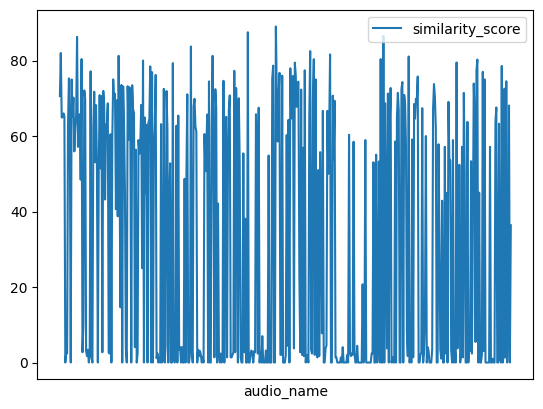

In [ ]:
import matplotlib.pyplot as plt

df1.plot(x='audio_name', y='similarity_score')
plt.xticks([])
plt.show()

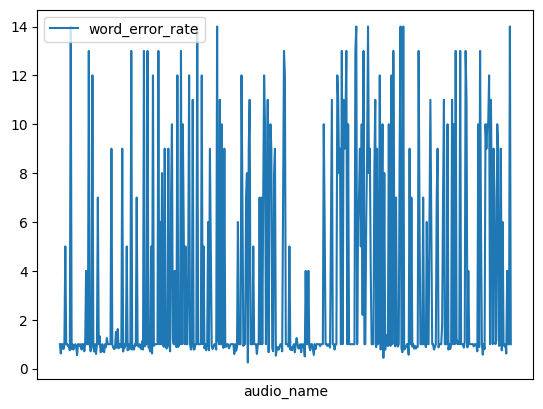

In [ ]:
import matplotlib.pyplot as plt

df1.plot(x='audio_name', y='word_error_rate')
plt.xticks([])
plt.show()

## **Hugging Face Model Train and Fine-Tuning with Custom Dataset**

In [ ]:
# access and work with models that are stored on the Hugging Face Hub.

from huggingface_hub import notebook_login

notebook_login()

In [ ]:
'''
soundfile - helps in reading and writing sound files
librosa - It can be helpful for extracting features from audio
evaluate - evaluating and comparing models and reporting their performance easier and more standardized
jiwer - calculating the Word Error Rate (WER)
tensorboard - It is a visualization tool included with TensorFlow. It helps in monitoring and debugging your machine learning models.
'''

!pip install --upgrade pip
!pip install --upgrade datasets transformers accelerate soundfile librosa evaluate jiwer tensorboard

In [ ]:
# DatasetDict - It is designed to organize and manage multiple datasets effectively - manage train and test dataset are clear

from datasets import load_dataset, DatasetDict

common_voice = DatasetDict()    # create empty DatasetDict

common_voice

DatasetDict({
    
})

In [ ]:
common_voice["train"] = load_dataset("mozilla-foundation/common_voice_11_0", "mr", split="train+validation", use_auth_token=True)
common_voice["train"]

Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 3927
})

In [ ]:
common_voice["test"] = load_dataset("mozilla-foundation/common_voice_11_0", "mr", split="test", use_auth_token=True)
common_voice["test"]

Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 1816
})

In [ ]:
print(common_voice)

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 3927
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 1816
    })
})


In [ ]:
common_voice = common_voice.remove_columns(["accent", "age", "client_id", "down_votes", "gender", "locale", "path", "segment", "up_votes"])
common_voice

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 3927
    })
    test: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 1816
    })
})

In [ ]:
# WhisperFeatureExtractor - It takes raw audio input and transforms it into a format that the model can understand the patterns

from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")
feature_extractor

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

WhisperFeatureExtractor {
  "chunk_length": 30,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 80,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "WhisperProcessor",
  "return_attention_mask": false,
  "sampling_rate": 16000
}

In [ ]:
# WhisperTokenizer -  The process of splitting long text into small chunks, where each chunk is called a token
#                     and is assigned a numerical representation, is essential for the computer to understand and process the information.

from transformers import WhisperTokenizer

tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small", language="Marathi", task="transcribe")
tokenizer

In [ ]:
input_str = common_voice["train"][0]["sentence"]                            # input sentence in Marathi taken from the common voice dataset
labels = tokenizer(input_str).input_ids                                     # tokenizer to broken down into smaller units, each assigned a numerical ID (token ID) to understandable by the model.
decoded_with_special = tokenizer.decode(labels, skip_special_tokens=False)  # माझं नाव गोपीनाथ आहे  (decode means token ID convert to human readable format)
decoded_str = tokenizer.decode(labels, skip_special_tokens=True)            # [CLS] माझं नाव गोपीनाथ आहे. [SEP] -----> model understand start and end of sequence

print(f"Input:                 {input_str}")
print(f"Labels:                 {labels}")
print(f"Decoded w/ special:    {decoded_with_special}")
print(f"Decoded w/out special: {decoded_str}")
print(f"Are equal:             {input_str == decoded_str}")


Input:                 आईचे आजारपण वाढत चालले, तसतशी मथीही नीट खातपीतनाशी झाली.
Labels:                 [50258, 50320, 50359, 50363, 3941, 228, 3941, 230, 3941, 248, 21981, 8485, 228, 3941, 250, 17937, 25411, 3941, 103, 3941, 96, 8485, 113, 17937, 3941, 95, 36158, 8485, 248, 17937, 46758, 46758, 21981, 11, 8485, 97, 45938, 36158, 3941, 114, 31881, 48449, 3941, 98, 31881, 44500, 31881, 8485, 101, 31881, 3941, 253, 8485, 244, 17937, 36158, 3941, 103, 31881, 36158, 35082, 17937, 3941, 114, 31881, 8485, 251, 17937, 46758, 31881, 13, 50257]
Decoded w/ special:    <|startoftranscript|><|mr|><|transcribe|><|notimestamps|>आईचे आजारपण वाढत चालले, तसतशी मथीही नीट खातपीतनाशी झाली.<|endoftext|>
Decoded w/out special: आईचे आजारपण वाढत चालले, तसतशी मथीही नीट खातपीतनाशी झाली.
Are equal:             True


In [ ]:
# WhisperProcessor - prepares your Marathi audio data so that it can be understood and transcribed by the Whisper model.
#                    It's like a translator between your raw audio and the model.

from transformers import WhisperProcessor

processor = WhisperProcessor.from_pretrained("openai/whisper-small", language="Marathi", task="transcribe")
processor

In [ ]:
print(common_voice["train"][0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f7e1ef6a2d14f20194999aad5040c5d4bb3ead1377de3e1bbc6e9dba34d18a8a/mr_train_0/common_voice_mr_30585613.mp3', 'array': array([ 1.13686838e-13, -1.42108547e-13, -1.98951966e-13, ...,
        4.83472422e-06,  3.54798703e-06,  1.63231743e-06]), 'sampling_rate': 48000}, 'sentence': 'आईचे आजारपण वाढत चालले, तसतशी मथीही नीट खातपीतनाशी झाली.'}


In [ ]:
'''
convert the sample audio data sampling rate from 48,000 to 16,000, ensuring compatibility with downstream tasks.
This standardization is essential for consistent processing and analysis in speech to text.
'''

In [ ]:
from datasets import Audio

common_voice = common_voice.cast_column("audio", Audio(sampling_rate=16000))
common_voice

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 3927
    })
    test: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 1816
    })
})

In [ ]:
print(common_voice["train"][0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f7e1ef6a2d14f20194999aad5040c5d4bb3ead1377de3e1bbc6e9dba34d18a8a/mr_train_0/common_voice_mr_30585613.mp3', 'array': array([-3.06954462e-12, -3.63797881e-12, -4.54747351e-12, ...,
       -7.74800901e-06, -1.74738125e-06,  4.36312439e-06]), 'sampling_rate': 16000}, 'sentence': 'आईचे आजारपण वाढत चालले, तसतशी मथीही नीट खातपीतनाशी झाली.'}


In [ ]:
def prepare_dataset(batch):

    # load and resample audio data from 48khz to 16kHz
    audio = batch["audio"]

    # compute log-Mel input features from input audio array
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]

    # encode target text to label ids
    batch["labels"] = tokenizer(batch["sentence"]).input_ids

    return batch


In [ ]:
common_voice = common_voice.map(prepare_dataset, remove_columns=common_voice.column_names["train"], num_proc=1)
common_voice

Map:   0%|          | 0/3927 [00:00<?, ? examples/s]

Map:   0%|          | 0/1816 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_features', 'labels'],
        num_rows: 3927
    })
    test: Dataset({
        features: ['input_features', 'labels'],
        num_rows: 1816
    })
})

In [ ]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch


In [ ]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)
data_collator

In [ ]:
import evaluate

metric = evaluate.load("wer")
metric

EvaluationModule(name: "wer", module_type: "metric", features: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}, usage: """
Compute WER score of transcribed segments against references.

Args:
    references: List of references for each speech input.
    predictions: List of transcriptions to score.
    concatenate_texts (bool, default=False): Whether to concatenate all input texts or compute WER iteratively.

Returns:
    (float): the word error rate

Examples:

    >>> predictions = ["this is the prediction", "there is an other sample"]
    >>> references = ["this is the reference", "there is another one"]
    >>> wer = evaluate.load("wer")
    >>> wer_score = wer.compute(predictions=predictions, references=references)
    >>> print(wer_score)
    0.5
""", stored examples: 0)

In [ ]:
def compute_metrics(pred):

    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # replace -100 with the pad_token_id
    label_ids[label_ids == -100] = tokenizer.pad_token_id

    # we do not want to group tokens when computing the metrics
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    wer = 100 * metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}


In [ ]:
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small",  device_map="auto")    # load_in_8bit=True
model

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.84k [00:00<?, ?B/s]

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (f

In [ ]:
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
                                          output_dir="./whisper-small-mr",  # change to a repo name of your choice
                                          per_device_train_batch_size=8,    # 8 samples pocessed in each training batch
                                          gradient_accumulation_steps=2,    # increase by 2x for every 2x decrease in batch size
                                          learning_rate=2e-2,               # learning_rate = 0.02
                                          warmup_steps=50,                  # learning rate graduqally incresed from 0 to 50 and after 50 it should same learning rate 50-100 steps
                                          max_steps=100,                    # Maximum number of training steps.
                                          gradient_checkpointing=True,      # it store only necessary results to save memory
                                          fp16=True,                        # 16-bit floating-point precision for certain operations & speeding up training
                                          evaluation_strategy="steps",
                                          per_device_eval_batch_size=8,     # evaluation batch size
                                          predict_with_generate=True,       # in evaluation will predict outcomes and also generate new sequences of text
                                          generation_max_length=225,        # Maximum length of generated sequences during evaluation.
                                          save_steps=50,                    # saving models in every 50 steps
                                          eval_steps=25,                    # evaluate the model during training in each 25 steps
                                          logging_steps=25,                 # logging information automatically stored by huggingface transformer library
                                          report_to=["tensorboard"],        # training logs should be reporte to TensorBoard
                                          load_best_model_at_end=True,
                                          metric_for_best_model="wer",
                                          greater_is_better=False,          # error metrics like Word Error Rate (WER) or similar, where lower values indicate better performance
                                          push_to_hub=True,
                                          push_to_hub_model_id="whisper-small-mr"
                                      )
training_args

Seq2SeqTrainingArguments(output_dir='./whisper-small-mr', overwrite_output_dir=False, do_train=False, do_eval=True, do_predict=False, evaluation_strategy=<IntervalStrategy.STEPS: 'steps'>, prediction_loss_only=False, per_device_train_batch_size=8, per_device_eval_batch_size=8, per_gpu_train_batch_size=None, per_gpu_eval_batch_size=None, gradient_accumulation_steps=2, eval_accumulation_steps=None, eval_delay=0, learning_rate=0.02, weight_decay=0.0, adam_beta1=0.9, adam_beta2=0.999, adam_epsilon=1e-08, max_grad_norm=1.0, num_train_epochs=3.0, max_steps=100, lr_scheduler_type=<SchedulerType.LINEAR: 'linear'>, lr_scheduler_kwargs={}, warmup_ratio=0.0, warmup_steps=50, log_level='passive', log_level_replica='warning', log_on_each_node=True, logging_dir='./whisper-small-mr/runs/Dec30_10-49-56_0db79d94c419', logging_strategy=<IntervalStrategy.STEPS: 'steps'>, logging_first_step=False, logging_steps=25, logging_nan_inf_filter=True, save_strategy=<IntervalStrategy.STEPS: 'steps'>, save_steps=50

In [ ]:
# manage the training process of sequence-to-sequence model

from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
                          args=training_args,
                          model=model,
                          train_dataset=common_voice["train"],
                          eval_dataset=common_voice["test"],
                          data_collator=data_collator,
                          compute_metrics=compute_metrics,
                          tokenizer=processor.feature_extractor)
trainer

In [ ]:
# To save the configuration and vocabulary settings of a language model processor

processor.save_pretrained(training_args.output_dir)

In [ ]:
trainer.train()

`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Step,Training Loss,Validation Loss,Wer
25,19.471000,35.392952,100.000000


Step,Training Loss,Validation Loss,Wer
25,19.471000,35.392952,100.000000


**Model Max_steps = 50**

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
                                          output_dir="./whisper-small-mr",  # change to a repo name of your choice
                                          per_device_train_batch_size=8,
                                          gradient_accumulation_steps=2,  # increase by 2x for every 2x decrease in batch size
                                          learning_rate=2e-2,
                                          warmup_steps=25,
                                          max_steps=50,
                                          gradient_checkpointing=True,
                                          fp16=True,
                                          evaluation_strategy="steps",
                                          per_device_eval_batch_size=8,
                                          predict_with_generate=True,
                                          generation_max_length=225,
                                          save_steps=50,
                                          eval_steps=50,
                                          logging_steps=50,
                                          report_to=["tensorboard"],
                                          load_best_model_at_end=True,
                                          metric_for_best_model="wer",
                                          greater_is_better=False,
                                          push_to_hub=True,
                                          push_to_hub_model_id="whisper-small-mr"
                                      )
training_args

Seq2SeqTrainingArguments(output_dir='./whisper-small-mr', overwrite_output_dir=False, do_train=False, do_eval=True, do_predict=False, evaluation_strategy=<IntervalStrategy.STEPS: 'steps'>, prediction_loss_only=False, per_device_train_batch_size=8, per_device_eval_batch_size=8, per_gpu_train_batch_size=None, per_gpu_eval_batch_size=None, gradient_accumulation_steps=2, eval_accumulation_steps=None, eval_delay=0, learning_rate=0.02, weight_decay=0.0, adam_beta1=0.9, adam_beta2=0.999, adam_epsilon=1e-08, max_grad_norm=1.0, num_train_epochs=3.0, max_steps=50, lr_scheduler_type=<SchedulerType.LINEAR: 'linear'>, lr_scheduler_kwargs={}, warmup_ratio=0.0, warmup_steps=25, log_level='passive', log_level_replica='warning', log_on_each_node=True, logging_dir='./whisper-small-mr/runs/Dec30_23-11-27_44c3f51c7637', logging_strategy=<IntervalStrategy.STEPS: 'steps'>, logging_first_step=False, logging_steps=50, logging_nan_inf_filter=True, save_strategy=<IntervalStrategy.STEPS: 'steps'>, save_steps=50,

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
                          args=training_args,
                          model=model,
                          train_dataset=common_voice["train"],
                          eval_dataset=common_voice["test"],
                          data_collator=data_collator,
                          compute_metrics=compute_metrics,
                          tokenizer=processor.feature_extractor)
trainer

In [ ]:
processor.save_pretrained(training_args.output_dir)

In [ ]:
trainer.train()

`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Step,Training Loss,Validation Loss,Wer
50,72.229600,153.046295,100.000000


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


TrainOutput(global_step=50, training_loss=72.2296435546875, metrics={'train_runtime': 2513.6542, 'train_samples_per_second': 0.318, 'train_steps_per_second': 0.02, 'total_flos': 2.30868320256e+17, 'train_loss': 72.2296435546875, 'epoch': 0.2})

**Model Max_steps = 100**

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
                                          output_dir="./whisper-small-mr",  # change to a repo name of your choice
                                          per_device_train_batch_size=8,
                                          gradient_accumulation_steps=2,  # increase by 2x for every 2x decrease in batch size
                                          learning_rate=2e-2,
                                          warmup_steps=50,
                                          max_steps=100,
                                          gradient_checkpointing=True,
                                          fp16=True,
                                          evaluation_strategy="steps",
                                          per_device_eval_batch_size=8,
                                          predict_with_generate=True,
                                          generation_max_length=225,
                                          save_steps=100,
                                          eval_steps=100,
                                          logging_steps=100,
                                          report_to=["tensorboard"],
                                          load_best_model_at_end=True,
                                          metric_for_best_model="wer",
                                          greater_is_better=False,
                                          push_to_hub=True,
                                          push_to_hub_model_id="whisper-small-mr"
                                      )
training_args

Seq2SeqTrainingArguments(output_dir='./whisper-small-mr', overwrite_output_dir=False, do_train=False, do_eval=True, do_predict=False, evaluation_strategy=<IntervalStrategy.STEPS: 'steps'>, prediction_loss_only=False, per_device_train_batch_size=8, per_device_eval_batch_size=8, per_gpu_train_batch_size=None, per_gpu_eval_batch_size=None, gradient_accumulation_steps=2, eval_accumulation_steps=None, eval_delay=0, learning_rate=0.02, weight_decay=0.0, adam_beta1=0.9, adam_beta2=0.999, adam_epsilon=1e-08, max_grad_norm=1.0, num_train_epochs=3.0, max_steps=100, lr_scheduler_type=<SchedulerType.LINEAR: 'linear'>, lr_scheduler_kwargs={}, warmup_ratio=0.0, warmup_steps=50, log_level='passive', log_level_replica='warning', log_on_each_node=True, logging_dir='./whisper-small-mr/runs/Dec30_13-29-34_b7eabe5028e2', logging_strategy=<IntervalStrategy.STEPS: 'steps'>, logging_first_step=False, logging_steps=100, logging_nan_inf_filter=True, save_strategy=<IntervalStrategy.STEPS: 'steps'>, save_steps=1

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
                          args=training_args,
                          model=model,
                          train_dataset=common_voice["train"],
                          eval_dataset=common_voice["test"],
                          data_collator=data_collator,
                          compute_metrics=compute_metrics,
                          tokenizer=processor.feature_extractor)
trainer

In [ ]:
processor.save_pretrained(training_args.output_dir)

In [ ]:
trainer.train()

`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Step,Training Loss,Validation Loss,Wer
100,84.853600,110.923683,100.000000


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


TrainOutput(global_step=100, training_loss=84.853642578125, metrics={'train_runtime': 2762.6552, 'train_samples_per_second': 0.579, 'train_steps_per_second': 0.036, 'total_flos': 4.61736640512e+17, 'train_loss': 84.853642578125, 'epoch': 0.41})

In [ ]:
peft_model_id = "gopiashokan/whisper-small-mr"

model.push_to_hub(peft_model_id)

 CommitInfo(commit_url='https://huggingface.co/gopiashokan/whisper-small-mr/commit/6d57dc68223efe0e33923f9753be04039359e302', commit_message='Upload
 WhisperForConditionalGeneration', commit_description='', oid='6d57dc68223efe0e33923f9753be04039359e302', pr_url=None, pr_revision=None, pr_num=None)
